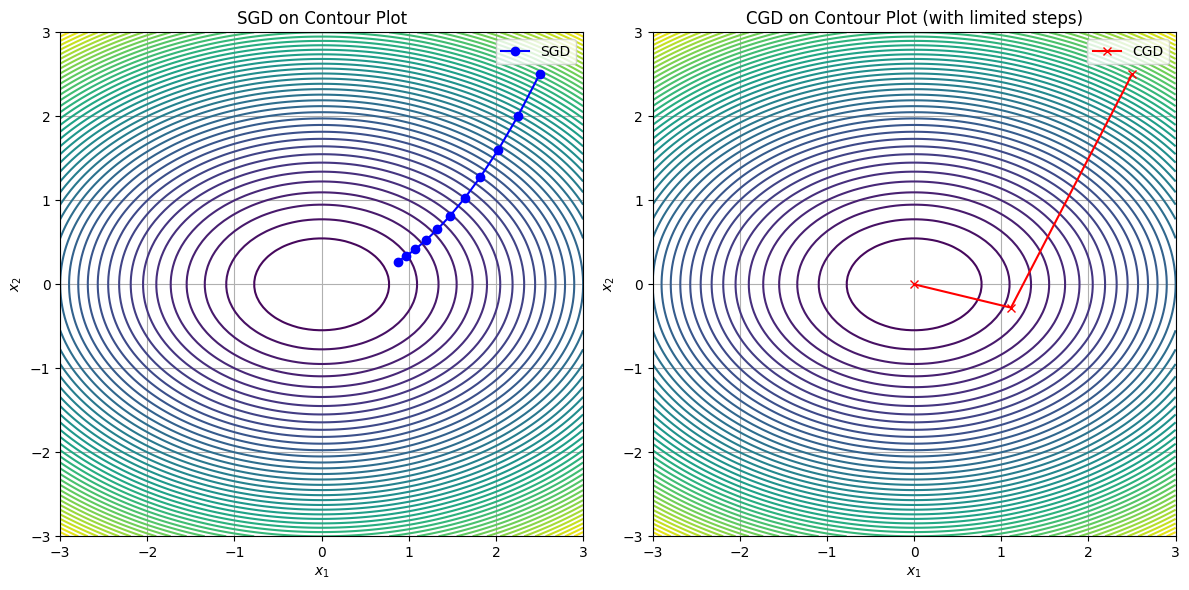

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the quadratic function
def quadratic_function(x):
    return 0.5 * (x[0] ** 2 + 2 * x[1] ** 2)

# Define the gradient of the quadratic function
def gradient(x):
    return np.array([x[0], 2 * x[1]])

# Stochastic Gradient Descent (SGD)
def sgd(x_init, learning_rate=0.1, num_iterations=10):
    x = x_init
    path = [x_init]
    for _ in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        path.append(x)
    return np.array(path)

# Modified Conjugate Gradient Descent (CGD) with limited iterations
def cgd_modified(x_init, max_iterations=3):
    res = minimize(quadratic_function, x_init, method='CG', jac=gradient, options={'return_all': True, 'maxiter': max_iterations})
    return np.array(res.allvecs)

# Create a contour plot of the quadratic function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (X ** 2 + 2 * Y ** 2)

# Initial point
x_init = np.array([2.5, 2.5])

# Plot for SGD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=50, cmap='viridis')
sgd_path = sgd(x_init)
plt.plot(sgd_path[:, 0], sgd_path[:, 1], marker='o', color='blue', label='SGD')
plt.title('SGD on Contour Plot')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

# Plot for modified CGD
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=50, cmap='viridis')
cgd_path = cgd_modified(x_init, max_iterations=3)  # Limit CGD to 3 iterations
plt.plot(cgd_path[:, 0], cgd_path[:, 1], marker='x', color='red', label='CGD')
plt.title('CGD on Contour Plot (with limited steps)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


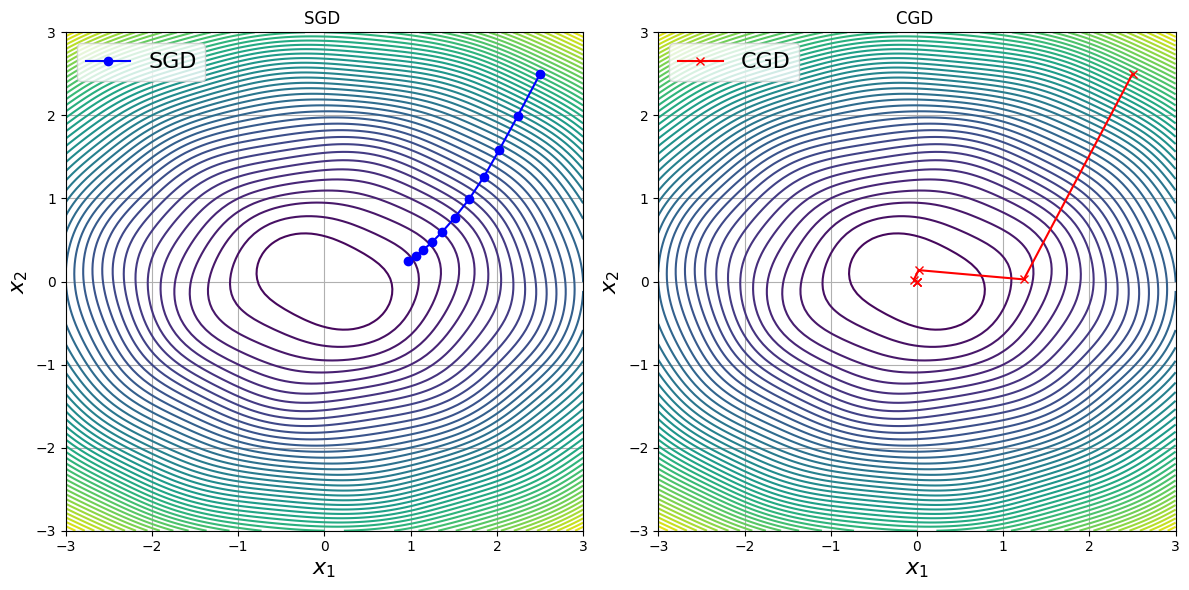

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define a modified quadratic function with a small non-convex component
def modified_function(x):
    return 0.5 * (x[0] ** 2 + 2 * x[1] ** 2) + 0.1 * np.sin(3 * x[0]) * np.sin(3 * x[1])

# Define the gradient of the modified function
def modified_gradient(x):
    grad_x1 = x[0] + 0.3 * np.cos(3 * x[0]) * np.sin(3 * x[1])
    grad_x2 = 2 * x[1] + 0.3 * np.sin(3 * x[0]) * np.cos(3 * x[1])
    return np.array([grad_x1, grad_x2])

# Stochastic Gradient Descent (SGD)
def sgd(x_init, learning_rate=0.1, num_iterations=10):
    x = x_init
    path = [x_init]
    for _ in range(num_iterations):
        grad = modified_gradient(x)
        x = x - learning_rate * grad
        path.append(x)
    return np.array(path)

# Conjugate Gradient Descent (CGD)
def cgd(x_init):
    res = minimize(modified_function, x_init, method='CG', jac=modified_gradient, options={'return_all': True})
    return np.array(res.allvecs)

# Create a contour plot of the modified function
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = modified_function([X, Y])

plt.figure(figsize=(12, 6))

# Plot for SGD
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=50, cmap='viridis')
sgd_path = sgd(np.array([2.5, 2.5]))
plt.plot(sgd_path[:, 0], sgd_path[:, 1], marker='o', color='blue', label='SGD')
plt.title('SGD ')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Plot for CGD
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=50, cmap='viridis')
cgd_path = cgd(np.array([2.5, 2.5]))
plt.plot(cgd_path[:, 0], cgd_path[:, 1], marker='x', color='red', label='CGD')
plt.title('CGD ')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.savefig('high_res_plot.png', dpi=600, bbox_inches='tight')
plt.show()
